In [113]:
import numpy as np

class blackjack:
    def __init__(self) -> None:
        self.card_probs = {
            2: 4 / 52,
            3: 4 / 52,
            4: 4 / 52,
            5: 4 / 52,
            6: 4 / 52,
            7: 4 / 52,
            8: 4 / 52,
            9: 4 / 52,
            10: 16 / 52,
            'A': 4 / 52
        }

        self.cards_sum = {str(i): i for i in range(2, 11)}

        self.cards = [2, 3, 4, 5, 6, 7, 8, 9, 10, 'A']

    def sum(self, cards):
        usable_ace = False
        ace_count = 0
        current_sum = 0
        for card in cards:
            if card == 'A':
                usable_ace = True
                ace_count += 1
            else:
                current_sum += self.cards_sum[card]

        if usable_ace:
            current_sum += 11
            current_sum += ace_count - 1
            if current_sum > 21:
                current_sum -= 10
                usable_ace = False
        return current_sum, usable_ace

    def draw(self, number):
        return np.random.choice(
            self.cards, number, [self.card_probs[card] for card in self.cards]
        ).tolist()

    def players_turn(self, cards, dealers_showing):
        episode = []
        psum, usableAce = self.sum(cards)
        episode.append((psum, usableAce, dealers_showing))
        while psum < 20:
            cards.append(self.draw(1)[0])
            psum, usableAce = self.sum(cards)
            episode.append((psum, usableAce, dealers_showing))

        return episode, psum

    def dealers_turn(self, cards):
        psum, usableAce = self.sum(cards)
        while psum < 17:
            cards.append(self.draw(1)[0])
            psum, usableAce = self.sum(cards)
        return psum

    def simulate_game(self):

        players_cards = self.draw(2)
        dealers_cards = self.draw(2)

        dealers_showing, dealerace = self.sum([dealers_cards[0]])

        episode, players_sum = self.players_turn(players_cards, dealers_showing)
        dealers_sum = self.dealers_turn(dealers_cards)

        if players_sum > 21 or dealers_sum > players_sum:
            reward = -1
        elif dealers_sum > 21 or players_sum > dealers_sum:
            reward = 1
        elif dealers_sum == players_sum:
            reward = 0


        game_info = {
            'episode': episode,
            'dealers_sum': dealers_sum,
            'reward': reward
        }

        return game_info

    def __call__(self):
        return self.simulate_game()


In [114]:

game = blackjack()
while True:
  print(game())


{'episode': [(11, False, 7), (19, False, 7), (22, False, 7)], 'dealers_sum': 23, 'reward': -1}
{'episode': [(19, False, 6), (29, False, 6)], 'dealers_sum': 17, 'reward': -1}
{'episode': [(20, False, 6)], 'dealers_sum': 21, 'reward': -1}
{'episode': [(13, False, 8), (23, False, 8)], 'dealers_sum': 18, 'reward': -1}
{'episode': [(5, False, 10), (12, False, 10), (20, False, 10)], 'dealers_sum': 19, 'reward': 1}
{'episode': [(17, False, 8), (23, False, 8)], 'dealers_sum': 20, 'reward': -1}
{'episode': [(17, True, 6), (21, True, 6)], 'dealers_sum': 17, 'reward': 1}
{'episode': [(20, True, 9)], 'dealers_sum': 20, 'reward': 0}
{'episode': [(14, True, 4), (14, False, 4), (17, False, 4), (25, False, 4)], 'dealers_sum': 17, 'reward': -1}
{'episode': [(7, False, 5), (16, False, 5), (21, False, 5)], 'dealers_sum': 19, 'reward': 1}
{'episode': [(20, True, 2)], 'dealers_sum': 21, 'reward': -1}
{'episode': [(21, True, 3)], 'dealers_sum': 17, 'reward': 1}
{'episode': [(12, False, 8), (18, False, 8), (

KeyboardInterrupt: 

In [192]:
value = np.array(
  [
    [
      [
       np.random.rand() for j in range(12,22)
       ] for k in range(2)
      ] for i in range(2, 12)
    ]
  )

returns = [[[[] for j in range(12,22)] for k in range(2)] for i in range(2,12)]


In [200]:
game = blackjack()
gamma = 0.9

def average(arr):
  s = 0
  for i in arr:
    s += i
  return s/len(arr)

games = 0
total_games = 490000

while games < total_games:
  info = game()
  episode = info['episode']
  g = info['reward']

  for t in range(len(episode)-1, -1, -1):
    g = gamma * g
    current_episode = episode[t]
    if current_episode in episode[:t-1]:
      if(current_episode[0] >= 12 and current_episode[0] <= 21):
        returns[current_episode[0] -12][1 if current_episode[1] == True else 0][current_episode[2] - 2].append(g)
        value[current_episode[0] -12, 1 if current_episode[1] == True else 0, current_episode[2] - 2] = average(returns[current_episode[0] - 12][1 if current_episode[1] == True else 0][current_episode[2] - 2])

  games += 1

  if(games % 10000 == 0):
    print("completed ", games, " games")


completed  10000  games
completed  20000  games
completed  30000  games
completed  40000  games
completed  50000  games
completed  60000  games
completed  70000  games
completed  80000  games
completed  90000  games
completed  100000  games
completed  110000  games
completed  120000  games
completed  130000  games
completed  140000  games
completed  150000  games
completed  160000  games
completed  170000  games
completed  180000  games
completed  190000  games
completed  200000  games
completed  210000  games
completed  220000  games
completed  230000  games
completed  240000  games
completed  250000  games
completed  260000  games
completed  270000  games
completed  280000  games
completed  290000  games
completed  300000  games
completed  310000  games
completed  320000  games
completed  330000  games
completed  340000  games
completed  350000  games
completed  360000  games
completed  370000  games
completed  380000  games
completed  390000  games
completed  400000  games
completed

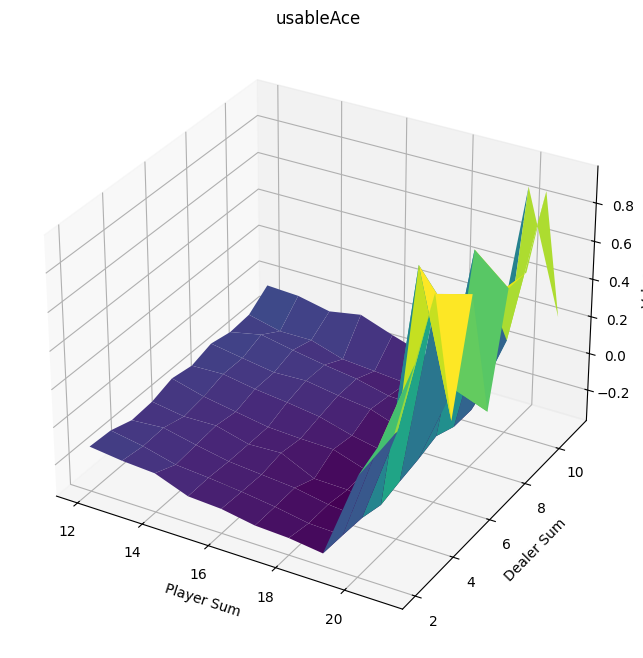

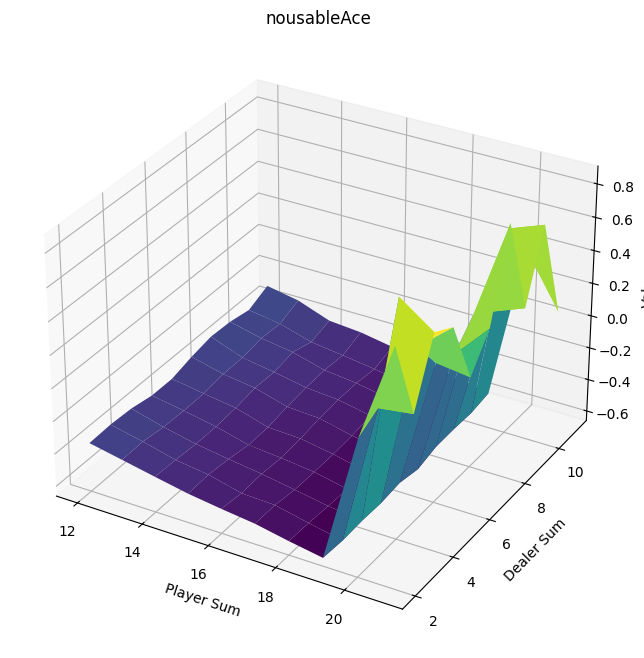

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

usable_ace_values = value[:, 1, :]
no_ace_values = value[:, 0, :]

# Function to plot the value function
def plot_value_function(value_function, title):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(12, 22)
    y = np.arange(2, 12)
    x, y = np.meshgrid(x, y)
    z = value_function.T

    ax.plot_surface(x, y, z, cmap='viridis')
    ax.set_xlabel('Player Sum')
    ax.set_ylabel('Dealer Sum')
    ax.set_zlabel('Value')
    ax.set_title(title)

    plt.show()

plot_value_function(usable_ace_values, 'usableAce')
plot_value_function(no_ace_values, 'nousableAce')
